In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('1.xlsx', index_col='No')

In [3]:
df.head()

,Jobs,BidangUsaha,JumlahKaryawan,Provinsi,Kota,TurnOver,StatusKaryawan,CaraAbsensi,JamMasuk,JamKeluar,...,ApakahCutiBersamaMemotongCutiTahunan,KapanKaryawanDapatCuti,KapanPlafonCuti,KaryawanBerhakCuti,JumlahHariCutiPertahun,FasilitasBPJS,LaporanHRDYangDiperlukan,ApakahMenerapkanLembur,PerhitunganLembur,UmurPerusahaan
No,,,,,,,,,,,,,,,,,,,,,
1,"Marketing, Keuangan/Finance, Sales, HRD",Kuliner,120,Jawa Barat,Bogor,Sedang,Karyawan Permanen,Absen mesin fingerprint,08.00,17.00,...,Ya,Sejak masuk,Setiap awal tahun,"Karyawan Percobaan, Karyawan Harian / Lepas",12.0,Ya,"Rekap absensi, Rekap gaji karyawan",NaN,NaN,NaN
2,HRD,Barang dan Jasa,1200,NaN,NaN,Tinggi,"Karyawan Permanen, Karyawan PKWT/Kontrak, Kary...",Manual,08.00,17.00,...,Tidak,Setelah 1 tahun,Setiap awal tahun,"Karyawan Permanen, Karyawan Kontrak / PKWT",12.0,Ya,Rekap gaji karyawan,NaN,NaN,NaN
3,"Marketing, Keuangan/Finance, GA/Administrasi, ...",Distributor,300,Jawa Timur,Surabaya,Sedang,"Karyawan Permanen, Karyawan PKWT/Kontrak",Absen mesin fingerprint,08.30,17.30,...,Ya,Setelah 1 tahun,Setiap awal tahun,"Karyawan Permanen, Karyawan Kontrak / PKWT",12.0,Ya,"Rekap absensi, Rekap gaji karyawan, Rekap cuti...",NaN,NaN,NaN
4,"Keuangan/Finance, Sales, HRD, IT, Social Media...",Advertising,22,Jawa Timur,Pasuruan,Rendah,"Karyawan Permanen, Karyawan PKWT/Kontrak",Absen mesin fingerprint,09.00,18.00,...,Ya,Setelah 1 tahun,Setiap awal tahun,Karyawan Permanen,14.0,Ya,"Rekap absensi, Rekap gaji karyawan, Rekap cuti...",NaN,NaN,NaN
5,"Marketing, Keuangan/Finance, GA/Administrasi, ...",Perusahaan Bongkar Muat,16,DI Yogyakarta,Yogyakarta,Rendah,"Karyawan Permanen, Karyawan PKWT/Kontrak",Belum Ada,08.30,17.30,...,Tidak,Setelah 1 tahun,Setiap awal tahun,"Karyawan Permanen, Karyawan Kontrak / PKWT",12.0,Ya,"Rekap absensi, Rekap gaji karyawan, Rekap cuti...",NaN,NaN,NaN


In [4]:
df.describe()

,JumlahKaryawan,JumlahHariCutiPertahun
count,142.000000,141.000000
mean,118.838028,12.177305
std,226.667803,2.624837
min,0.000000,0.000000
25%,20.000000,12.000000
50%,48.500000,12.000000
75%,100.000000,12.000000
max,1400.000000,22.000000


In [139]:
df.shape

(142, 30)

In [140]:
print(df.columns)

Index(['Jobs', 'BidangUsaha', 'JumlahKaryawan', 'Provinsi', 'Kota', 'TurnOver',
       'StatusKaryawan', 'CaraAbsensi', 'JamMasuk', 'JamKeluar', 'PeriodeGaji',
       'KomponenGaji', 'PengelolaanGaji', 'SistemHRD',
       'KomponenPenggajianBerbeda', 'JenisPembagianTHR', 'THRStatusKaryawan',
       'PerhitunganTHR', 'ApakahPPH21', 'ApakahPPH21Ditanggung',
       'ApakahCutiBersamaMemotongCutiTahunan', 'KapanKaryawanDapatCuti',
       'KapanPlafonCuti', 'KaryawanBerhakCuti', 'JumlahHariCutiPertahun',
       'FasilitasBPJS', 'LaporanHRDYangDiperlukan', 'ApakahMenerapkanLembur',
       'PerhitunganLembur', 'UmurPerusahaan'],
      dtype='object')


In [141]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]

if not null_counts.empty:
    print(null_counts)

BidangUsaha               37
Provinsi                  60
Kota                      60
TurnOver                   1
CaraAbsensi                6
SistemHRD                  1
JumlahHariCutiPertahun     1
ApakahMenerapkanLembur    80
PerhitunganLembur         81
UmurPerusahaan            81
dtype: int64


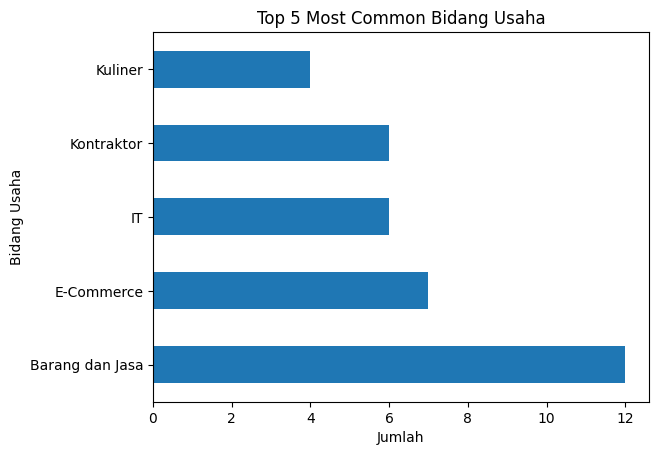

In [142]:
# Answering 1st question: Determine the top 5 most common Bidang Usaha among the dataset.

bidang_usaha_counts = df['BidangUsaha'].value_counts()
top5_bidang_usaha = bidang_usaha_counts.head(5)
top5_bidang_usaha.plot(kind='barh')
plt.xlabel('Jumlah')
plt.ylabel('Bidang Usaha')
plt.title('Top 5 Most Common Bidang Usaha')
plt.show()

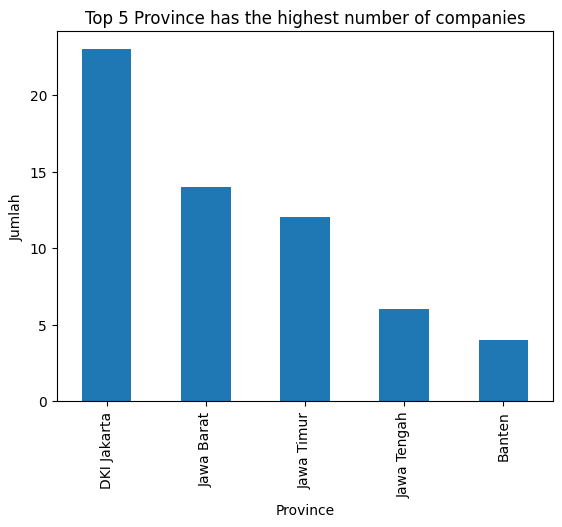

In [143]:
# Answering 2nd question: Determine the top 5 province has the highest number of companies

province_filtered = df[df['Provinsi'].notnull()]
province_count = province_filtered['Provinsi'].value_counts()
top5_province = province_count.head(5)
top5_province.plot(kind='bar')
plt.xlabel('Province')
plt.ylabel('Jumlah')
plt.title('Top 5 Province has the highest number of companies')
plt.show()

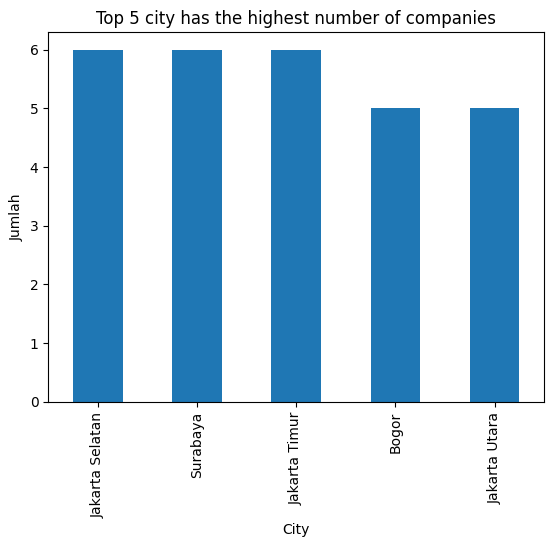

In [144]:
# Answering 3rd question: Determine the top 5 city has the highest number of companies

city_filtered = df[df['Kota'].notnull()]
city_count = city_filtered['Kota'].value_counts()
top5_city = city_count.head(5)
top5_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Jumlah')
plt.title('Top 5 city has the highest number of companies')
plt.show()

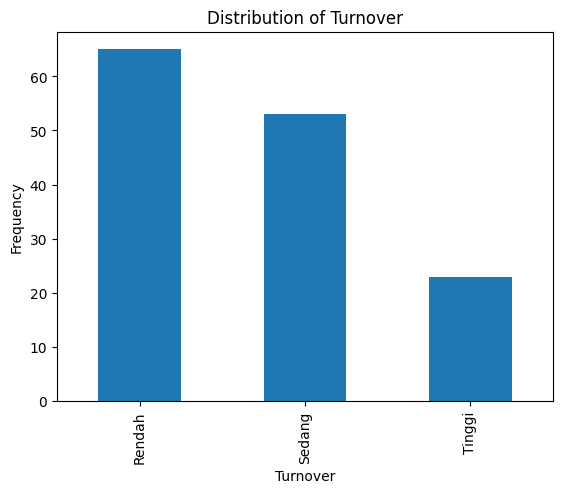

In [145]:
# Answering 4th question: Finding the distribution of turnover values.

turnover_filtered = df.dropna(subset=['TurnOver'])
turnover_count = turnover_filtered['TurnOver'].value_counts()
turnover_count.plot(kind='bar')
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Distribution of Turnover')
plt.show()

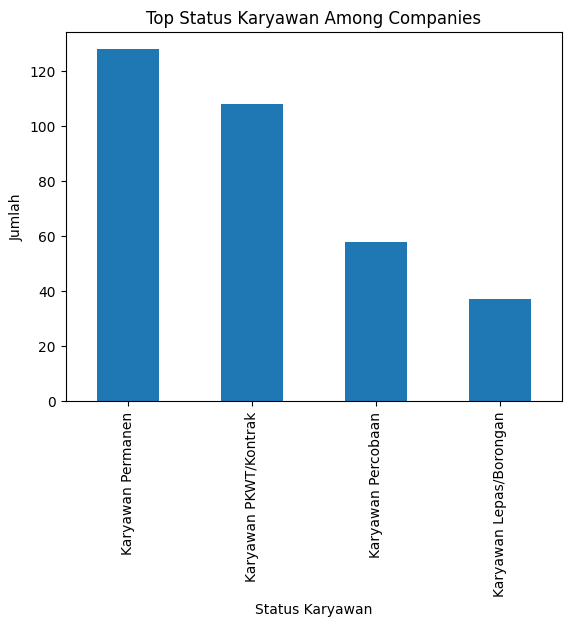

In [146]:
# Answering 5th question: What is the most common employee status among the companies?

status_karyawan = df['StatusKaryawan'].str.split(', ')
status_karyawan = status_karyawan.explode().reset_index(drop=True)
status_counts = status_karyawan.value_counts()
top5_status = status_counts.head()
top5_status.plot(kind='bar')
plt.xlabel('Status Karyawan')
plt.ylabel('Jumlah')
plt.title('Top Status Karyawan Among Companies')
plt.show()

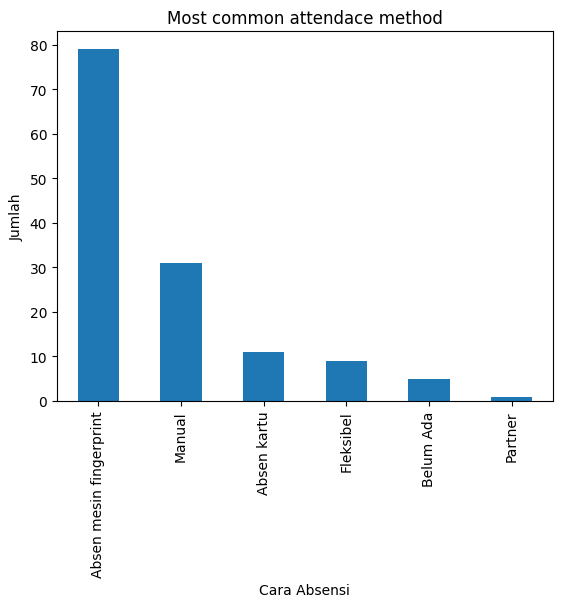

In [147]:
# Answering 6th question:  What is the most common attendance method used by the companies

cara_absensi = df['CaraAbsensi'].str.split(', ')
cara_absensi = cara_absensi.explode().reset_index(drop=True)
absensi_counts = cara_absensi.value_counts()
absensi_counts.plot(kind='bar')
plt.xlabel('Cara Absensi')
plt.ylabel('Jumlah')
plt.title('Most common attendace method')
plt.show()

In [148]:
# Answering the 7th question: What is the average, 25th percentile, and 75th percentile jumlah karyawan?

jumlah_karyawan = df['JumlahKaryawan']
average = jumlah_karyawan.mean()
percentile_25 = jumlah_karyawan.quantile(0.25)
percentile_75 = jumlah_karyawan.quantile(0.75)
print("Average Jumlah Karyawan          : ", average)
print("25th Percentile Jumlah Karyawan  : ", percentile_25)
print("75th Percentile Jumlah Karyawan  : ", percentile_75)

Average Jumlah Karyawan          :  118.83802816901408
25th Percentile Jumlah Karyawan  :  20.0
75th Percentile Jumlah Karyawan  :  100.0


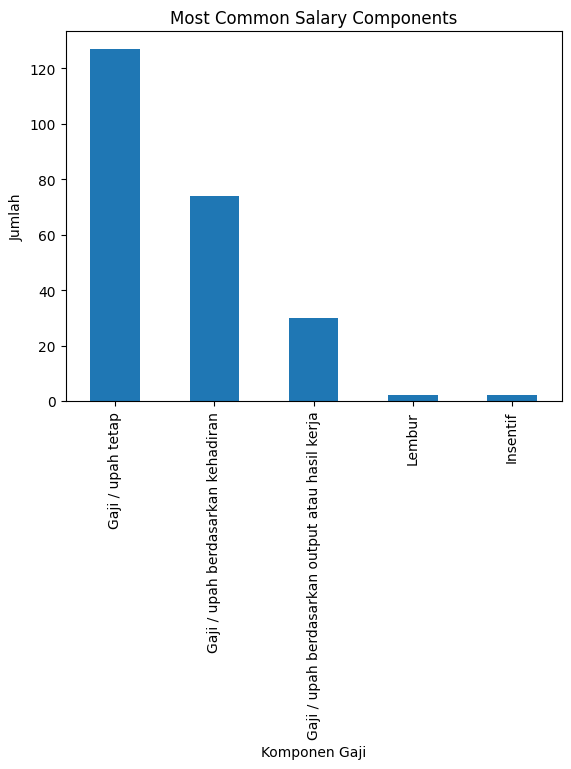

In [149]:
# Answering the 8th question: What is the most common salary components used among companies?

komponen_gaji = df['KomponenGaji'].str.split(', ')
komponen_gaji = komponen_gaji.explode().reset_index(drop=True)
komponen_gaji_count = komponen_gaji.value_counts()
top5_komponengaji = komponen_gaji_count.head(5)
top5_komponengaji.plot(kind='bar')
plt.xlabel('Komponen Gaji')
plt.ylabel('Jumlah')
plt.title("Most Common Salary Components")
plt.show()

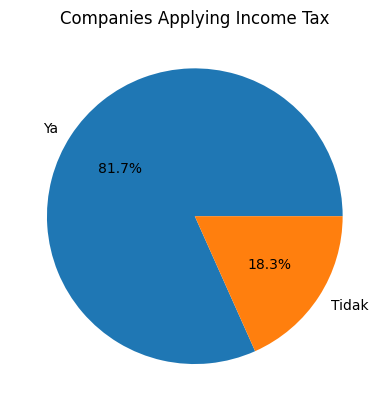

In [150]:
# Answering the 9th question: Percentage difference of companies who apply income tax to their employees?

pph21_counts = df['ApakahPPH21'].value_counts()
plt.pie(pph21_counts, labels=pph21_counts.index, autopct='%1.1f%%')
plt.title('Companies Applying Income Tax')
plt.show()

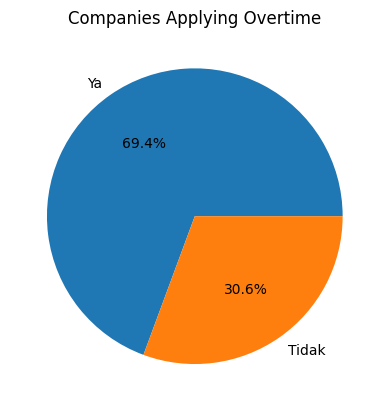

In [151]:
# Answering the 10th question: Percentage difference of companies implementing overtime on their employees?

lembur_counts = df['ApakahMenerapkanLembur'].value_counts()
plt.pie(lembur_counts, labels=lembur_counts.index, autopct='%1.1f%%')
plt.title('Companies Applying Overtime')
plt.show()

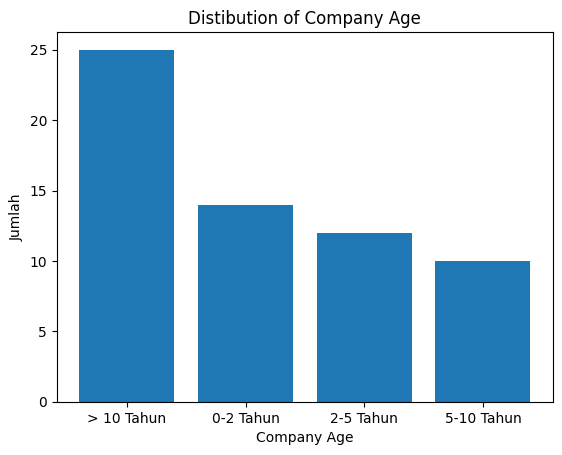

In [152]:
# Answering the 11th question: Distribution of company age among companies

df['UmurPerusahaan'] = df['UmurPerusahaan'].replace({
    '> 10 Tahun': '> 10 Tahun',
    '2 - 5 Tahun': '2-5 Tahun',
    '0 - 2 Tahun': '0-2 Tahun',
    '5 - 10 Tahun': '5-10 Tahun'
})

umur_counts = df['UmurPerusahaan'].value_counts(dropna=True)
plt.bar(umur_counts.index, umur_counts)
plt.xlabel('Company Age')
plt.ylabel('Jumlah')
plt.title('Distibution of Company Age')
plt.show()

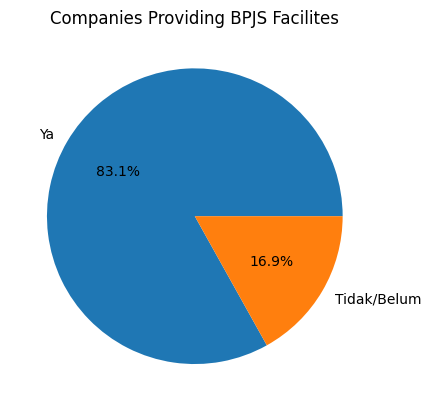

In [153]:
# Answering the 12th question: Percentage difference between companies who provide BPJS and companies who isn't

bpjs_counts = df['FasilitasBPJS'].value_counts(dropna=True)
labels = bpjs_counts.index
size = bpjs_counts.values
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Companies Providing BPJS Facilites')
plt.show()

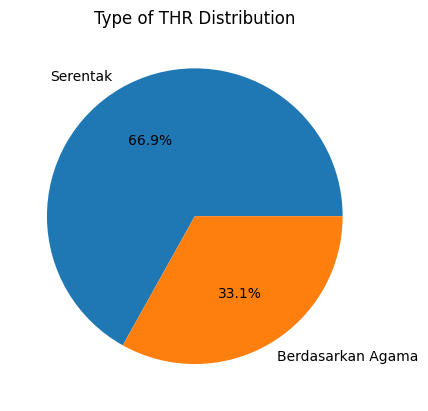

In [154]:
# Answering the 13th question: Percentage difference of Type of THR Distribution 

df['JenisPembagianTHR'] = df['JenisPembagianTHR'].replace('Agama', 'Berdasarkan Agama')
thr_counts = df['JenisPembagianTHR'].value_counts(dropna=False)
plt.pie(thr_counts.values, labels=thr_counts.index, autopct='%1.1f%%')
plt.title('Type of THR Distribution')
plt.show()


In [155]:
# Answering the 14th question: What is the average of number of annual leave days given to employees?

print("Average day leave: ", df['JumlahHariCutiPertahun'].mean())

Average day leave:  12.177304964539006


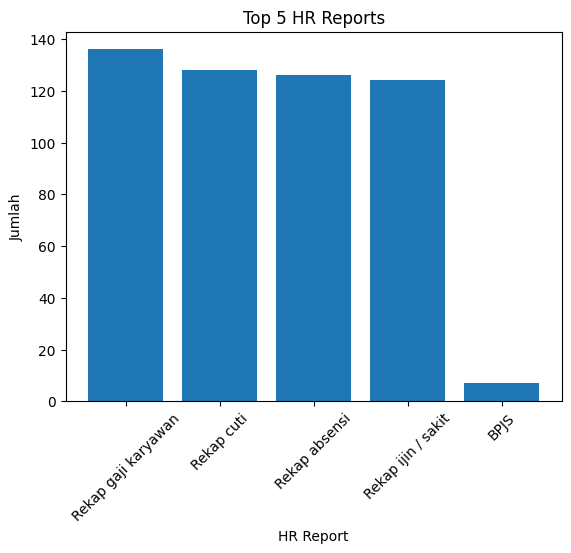

In [156]:
# Answering the 15th question: What are the most HR Report needed among companies?

reports = df['LaporanHRDYangDiperlukan'].str.split(', ')
all_reports = []
for row in reports:
    all_reports.extend(row)

report_series = pd.Series(all_reports)
report_counts = report_series.value_counts()
top5_report = report_counts.head(5)

plt.bar(top5_report.index, top5_report.values)
plt.xlabel("HR Report")
plt.ylabel('Jumlah')
plt.title("Top 5 HR Reports")
plt.xticks(rotation=45)
plt.show()